In [282]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Task 1

In [172]:
a=1 #границы отрезка
n=8 #колво узлов

In [341]:
def f(x):
    return (x**2 + 4*np.sin(x) - 2)

In [263]:
#подсчет коэффициентов полинома Лагранжа
def l_k(x, k, X):
    l=1
    for i in range(len(X)):
        if i!=k:
            l*=(x-X[i])/(X[k]-X[i])
    return l

In [264]:
# полином Лагранжа. Х-узлы
def L1(x,X): 
    L=0
    for i in range(len(X)):
        L+=l_k(x,i,X)*f(X[i])
    return L       

In [265]:
# поиск корней полинома Чебышева
def Ch(n,a):
    X=[]
    for i in range(n):
        X.append(a*np.cos((2*i+1)/(2*n+2)*np.pi))
    return X

In [266]:
x=np.linspace(-a,a,num=100)
X=np.linspace(-a,a, num=n)
X_Ch=Ch(n,a)

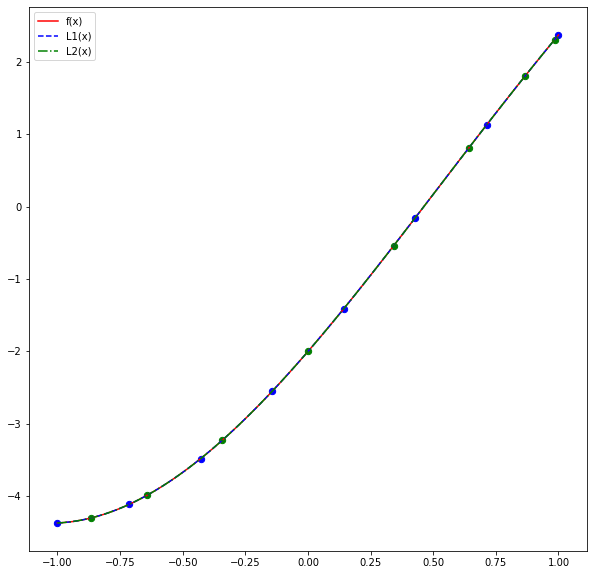

In [267]:
plt.rcParams["figure.figsize"] = (10,10)
fig = plt.figure()
plt.plot(x, [f(_) for _ in x],'r-', label = 'f(x)')
plt.plot(x, L1(x,X), 'b--', label = 'L1(x)')
plt.plot(x, L1(x,X_Ch), 'g-.', label='L2(x)')
plt.scatter(X, L1(X,X), color='blue', s=40, marker='o')
plt.scatter(X_Ch, L1(X_Ch,X_Ch), color='green', s=40, marker='o')
# plt.axis('equal')
plt.legend()
plt.show()

In [268]:
# подсчет погрешности
def E1(x,X):
    max=0
    for i in x:
        diff=abs(f(i)-L1(i,X))
        if diff>max:
            max=diff
    return max        

In [269]:
print(E1(x,X),E1(x,X_Ch))

2.801459060286504e-07 4.2168052161173364e-08


In [238]:
N=np.random.choice(np.arange(3,12), size=5, replace=False) 
print('N\t',end=' ')
for i in N:
    print(i,'\t\t\t', end=' ')
print('\nL_p\t', end='')
for i in N:
    X=np.linspace(-a,a, num=i)
    print(E1(x,X),'\t', end='')
print('\nL_Ch\t', end='')
for i in N:
    X_Ch=Ch(i,a)
    print(E1(x,X_Ch),'\t', end='')

N	 8 			 9 			 10 			 3 			 11 			 
L_p	0.11054689059636513 	0.10598255717744287 	0.09402641016590041 	0.33066599311695083 	0.09099001811794896 	
L_Ch	0.11222824814150734 	0.30418991063496126 	0.09152291755225436 	0.8223043574527638 	0.2524108995636638 	

# Task 2

In [178]:
def h(x):
    return f(x)*abs(x)

In [179]:
# полином Лагранжа. Х-узлы
def L2(x,X): 
    L=0
    for i in range(len(X)):
        L+=l_k(x,i,X)*h(X[i])
    return L   

In [180]:
# подсчет погрешности
def E2(x,X):
    max=0
    for i in x:
        diff=abs(h(i)-L2(i,X))
        if diff>max:
            max=diff
    return max  

In [232]:
x=np.linspace(-a,a,num=200)
N=np.random.choice(np.arange(3,12), size=5, replace=False)      #np.random.randint(3, 12, )
print('N\t',end=' ')
for i in N:
    print(i,'\t\t\t', end=' ')
print('\nL_p\t', end='')
for i in N:
    X=np.linspace(-a,a, num=i)
    print(E2(x,X),'\t', end='')
print('\nL_Ch\t', end='')
for i in N:
    X_Ch=Ch(i,a)
    print(E2(x,X_Ch),'\t', end='')

N	 7 			 6 			 4 			 11 			 9 			 
L_p	0.21756112037009342 	0.17043727141069676 	0.2104005815439356 	0.4459123190652457 	0.23853053122817913 	
L_Ch	0.6930661841147141 	0.7137872377828423 	0.2102204027609993 	0.4354425622356679 	0.10425182560030422 	

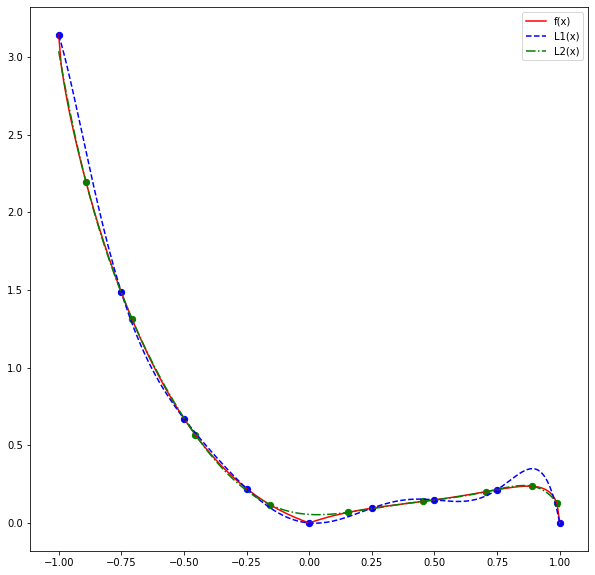

In [229]:
plt.rcParams["figure.figsize"] = (10,10)
fig = plt.figure()
plt.plot(x, [h(_) for _ in x],'r-', label = 'f(x)')
plt.plot(x, L2(x,X), 'b--', label = 'L1(x)')
plt.plot(x, L2(x,X_Ch), 'g-.', label='L2(x)')
plt.scatter(X, L2(X,X), color='blue', s=40, marker='o')
plt.scatter(X_Ch, L2(X_Ch,X_Ch), color='green', s=40, marker='o')
# plt.axis('equal')
plt.legend()
plt.show()

# TASK 3

In [246]:
def f_1(x):
    return (2*x + 4*np.cos(x))

In [349]:
F=[f.__name__,f_1.__name__]

In [355]:
def Hermite(x,X,m):
    n=len(X)  # n data points, m derivatives
    # derivative matrix
    matrix=np.zeros((n,m)) 
    for i in range(n):
        for j in range(m):
            matrix[i,j]=F[j](X[i])
    
    return matrix

In [354]:
X=np.linspace(-a,a, num=3)
x=np.linspace(-a,a,num=200)
M=Hermite(x,X,2)
X

array([-1.,  0.,  1.])

In [356]:
M

array([[-4.36588394,  0.16120922],
       [-2.        ,  4.        ],
       [ 2.36588394,  4.16120922]])

In [357]:
def DividedDifference(X, df, m):
    n=len(X)
    dd=np.zeros((n*m, n*m)) # matrix of divided difference
    z=np.zeros(n*m)
    k=0 # row index
    for i in range(n):
        for j in range(m):
#             k=(i-1)*m+j
            print(k)
            z[k]=X[i]
            dd[k,0]=df[i,0]
#             print(f'{ z[k,0]} | {dd[k,0]}')
            for l in range(1,k):
#                 print(f'{ dd[k,l-1]} | {dd[k-1,l-1]}\n')
                if dd[k,l-1]==dd[k-1,l-1]:
                    dd[k,l]=df[i,l]/math.factorial(l-1)
                else:
                    print(z[k],z[k-l+1])
                    dd[k,l]=(dd[k,l-1]-dd[k-1,l-1])/(z[k]-z[k-l+1])
#                 print(f'{dd[k,l]}')
            k+=1
    print(dd)

In [358]:
DividedDifference(X,M,2)

0
1
2
0.0 0.0
3
0.0 0.0
4
1.0 1.0
1.0 0.0
1.0 0.0
5
1.0 1.0
1.0 0.0
1.0 0.0
[[-4.36588394  0.          0.          0.          0.          0.        ]
 [-4.36588394  0.          0.          0.          0.          0.        ]
 [-2.                 inf  0.          0.          0.          0.        ]
 [-2.          4.                -inf  0.          0.          0.        ]
 [ 2.36588394         inf         inf         inf  0.          0.        ]
 [ 2.36588394  4.16120922        -inf        -inf        -inf  0.        ]]


C:\Users\Public\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in double_scalars
